In [1]:
!pip3 install -U scikit-learn matplotlib numpy pandas elasticsearch python-telegram-bot

     ---------------------------------------- 9.3/9.3 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 10.8/10.8 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 412.8/412.8 KB 2.1 MB/s eta 0:00:00
     ------------------------------------- 552.6/552.6 KB 11.5 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 44.3/44.3 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 181.9/181.9 KB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 56.2/56.2 KB 2.9 MB/s eta 0:00:00
     -------------------------------------- 103.

You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from telegram import Bot
import asyncio



In [3]:
from elasticsearch import Elasticsearch

es = Elasticsearch(
    "http://34.143.255.36:9200/",basic_auth=("elastic","elastic2023"))
index_name = 'it5384_group8_problem5_index'
query = {"query": {"match_all": {}}}

result = es.search(index=index_name, body=query)

hits = result.get("hits", {}).get("hits", [])
result_query = [hit["_source"] for hit in hits]
for document in result_query:
    print(document)

raw_df = pd.json_normalize(result_query)
# df = raw_df.drop('address',axis=1)
# print(df)
df = raw_df.drop(['Time',"address"],axis=1)

print(df)


{'address': '0x2fe711799016101950d2126687ee944ff359c3b7', 'num_transactions': 1, 'balance': 1.0, 'Time': 59}
{'address': '0x33508f8e25c2ca2e9f0b48a20e6da6fce632d111', 'num_transactions': 2, 'balance': 0.017, 'Time': 60}
{'address': '0x16cd96e913e60b4806918a53a771c630fb322795', 'num_transactions': 2, 'balance': 0.001, 'Time': 61}
{'address': '0x6f2c52a7258022304db41a9568c888540b701148', 'num_transactions': 1, 'balance': 0.016347146, 'Time': 65}
{'address': '0x103e37ad040437420f53c1c5a2869ac1d6149331', 'num_transactions': 1, 'balance': 0.113908139, 'Time': 66}
{'address': '0x5cea0fb93ca3fc25324de3307f40edd79338980c', 'num_transactions': 1, 'balance': 0.9979559, 'Time': 68}
{'address': '0x049029dd41661e58f99271a0112dfd34695f7000', 'num_transactions': 2, 'balance': 1.016263146, 'Time': 112}
{'address': '0x9e6316f44baeeee5d41a1070516cc5fa47baf227', 'num_transactions': 2, 'balance': 0.699916, 'Time': 118}
{'address': '0x3c2a948a01975757864303d05bbf19df1af9c454', 'num_transactions': 2, 'balan

In [4]:
# The features are the properties of a wallet, such as balance, number of transactions, etc.
# Replace this with your actual data.

features = np.array(df)
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)
# Define the Isolation Forest model.
# Adjust the 'n_estimators' and 'contamination' parameters as per your specific requirements.
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, max_features=1.0)

# Fit the model to the training data.
model.fit(features_normalized)
anomaly_scores = model.decision_function(features_normalized)
threshold = -0.5 # This threshold value can be adjusted as per your specific requirements.
risky_wallets = features[anomaly_scores < threshold]
print(features_normalized)

[[-1.09321633  0.5108024 ]
 [ 0.46852129 -0.83197376]
 [ 0.46852129 -0.85382973]
 [-1.09321633 -0.83286555]
 [-1.09321633 -0.69959742]
 [-1.09321633  0.50801016]
 [ 0.46852129  0.53301783]
 [ 0.46852129  0.10088822]
 [ 0.46852129 -0.85382973]
 [ 2.0302589   2.41937757]]


In [6]:
# init bot telegram
bot = Bot(token='6845513846:AAHbmWW4Hhc35lnpIwTKW63o5RiZzA3-wSQ')

channel_id = '@group8_bigdata'

# Get the anomaly labels for each wallet in the dataset.
labels = model.predict(features_normalized)
print(labels)
# Check the anomaly labels.
for i, label in enumerate(labels):
    if label == -1:
        print(f"Wallet {raw_df['address'][i]} is risky.")
        await bot.send_message(chat_id=channel_id, text=f"Wallet {raw_df['address'][i]} is risky.")

    else:
        print(f"Wallet {raw_df['address'][i]} is normal.")


[ 1  1  1  1  1  1  1  1  1 -1]
Wallet 0x2fe711799016101950d2126687ee944ff359c3b7 is normal.
Wallet 0x33508f8e25c2ca2e9f0b48a20e6da6fce632d111 is normal.
Wallet 0x16cd96e913e60b4806918a53a771c630fb322795 is normal.
Wallet 0x6f2c52a7258022304db41a9568c888540b701148 is normal.
Wallet 0x103e37ad040437420f53c1c5a2869ac1d6149331 is normal.
Wallet 0x5cea0fb93ca3fc25324de3307f40edd79338980c is normal.
Wallet 0x049029dd41661e58f99271a0112dfd34695f7000 is normal.
Wallet 0x9e6316f44baeeee5d41a1070516cc5fa47baf227 is normal.
Wallet 0x3c2a948a01975757864303d05bbf19df1af9c454 is normal.
Wallet 0x8b24dee23df99cba0560f0ec798ddb1505c70299 is risky.


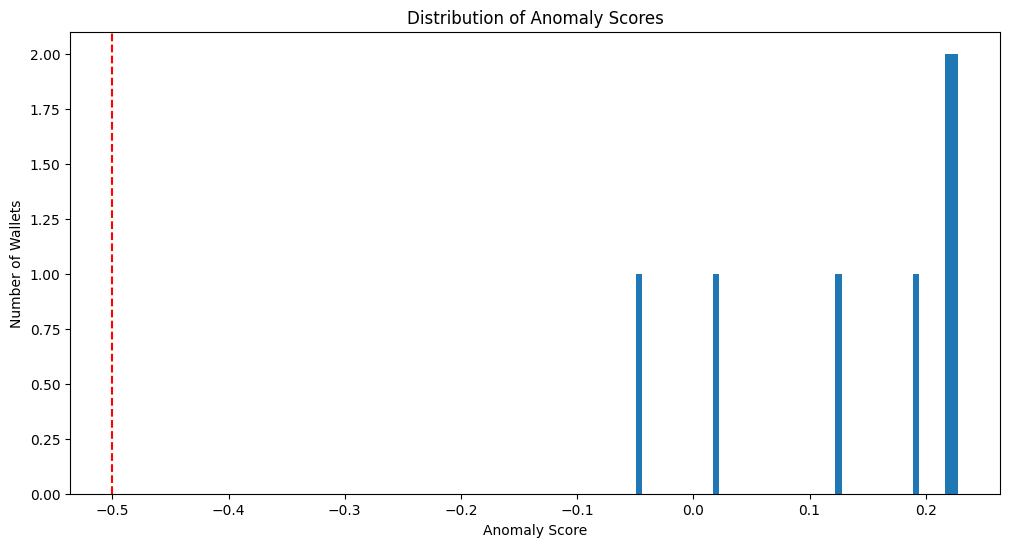

In [88]:
plt.figure(figsize=(12, 6))
plt.hist(anomaly_scores, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Wallets')
plt.title('Distribution of Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--')
plt.show()